Tugas:
Tambahkan ilustrasi pendukung (daerah feasible yang mana0, kemudian proses iterasi interior point tunjukkan pada daerah tersebut bagaimana:



---

# **METODE INTERIOR POINT**

*Mata Kuliah: Optimasi Nonlinear*

## 1. Pengantar

Bayangkan Anda ingin menemukan “harta karun” berupa nilai optimal dari suatu fungsi, tetapi Anda tidak ingin menyentuh batas wilayah pencariannya. Anda memilih menjadi penjelajah elegan yang selalu berjalan di **dalam** wilayah yang diperbolehkan, menjauhi tebing batasan. Itulah filosofi **Metode Interior Point**.

Metode ini merupakan teknik optimasi yang **mengatasi kendala** dengan menjaga solusi tetap berada di **interior** daerah feasible hingga saat mendekati optimum, lalu perlahan “menyentuh” batas pada akhirnya.

Diperkenalkan secara praktis oleh Karmarkar (1984) untuk pemrograman linear, metode ini kemudian berkembang luas untuk **optimasi nonlinear**.

---

## 2. Masalah Optimasi dengan Kendala

Kita fokus pada bentuk umum:

Minimalkan
  **f(x)**
terhadap kendala:
  **gᵢ(x) ≤ 0**, i = 1 … m
  **hⱼ(x) = 0**, j = 1 … p

Di mana:

* f(x) = fungsi objektif yang ingin diminimalkan
* gᵢ(x) = batasan **inequality**
* hⱼ(x) = batasan **equality**

Tujuannya adalah menemukan **titik optimum** x* yang memenuhi **kondisi optimalitas Karush-Kuhn-Tucker (KKT)**.

---

## 3. Ide Utama Interior Point

Metode interior point membuat batasan inequality tidak perlu disentuh sejak awal. Ini dicapai dengan memperkenalkan **fungsi barrier** yang menghukum ketika solusi mencoba keluar dari wilayah feasible.

Untuk kendala gᵢ(x) ≤ 0, fungsi barrier yang sering digunakan:

  **Φ(x) = - Σ ln(-gᵢ(x))**

Logaritma ini akan menuju tak hingga jika gᵢ(x) mendekati 0 (batas feasible). Artinya:
❌ Dilarang mendekati pagar sebelum waktunya.

---

## 4. Formulasi Fungsi Barrier

Masalah baru yang diselesaikan:

  **Minimalkan**
    F(x, μ) = f(x) + μ Φ(x)

dengan parameter **μ > 0** yang disebut **parameter barrier**.

* Saat μ besar: solusi berada jauh di dalam interior
* Saat μ mengecil: solusi perlahan mendekati batas feasible
* μ → 0: solusi mendekati optimum KKT

Proses ini seperti **jalan setapak** (central path) menuju puncak optimum.

---

## 5. Central Path & Pendekatan Bertahap

Metode interior point melakukan iterasi:

1. Pilih μ awal yang besar
2. Selesaikan masalah barrier untuk mendapatkan x(μ)
3. Kecilkan μ secara bertahap (contoh: μ ← β μ dengan β < 1)
4. Lanjutkan iterasi hingga mendekati optimum

Setiap iterasi merupakan perjalanan di **central path**, jalur elegan menuju solusi optimal tanpa terperosok ke pematang batasan.

---

## 6. Penyelesaian Sub-masalah: Pendekatan Newton

Metode Newton digunakan untuk mempercepat pencarian titik stasioner:

  ∇F(x, μ) = 0

Karena F(x, μ) nonlinear, kita menghitung:

* Gradient ∇F(x, μ)
* Hessian ∇²F(x, μ)

Newton update:
  x ← x + α d
d = arah pencarian
α = langkah pergerakan disesuaikan agar tetap di interior

---

## 7. Kondisi KKT sebagai Tujuan Akhir

Pada μ → 0, solusi yang dicapai akan memenuhi:

* Stasioneritas
* Primal feasibility
* Dual feasibility
* Complementary slackness

KKT menjadi **kompas** yang memastikan perjalanan kita ke optimum benar arah.







# **Contoh 1: Fungsi Kuadrat dengan Kendala Linear**

**Masalah:**

$$
\min f(x) = x^2 + 4x + 4
$$

dengan kendala:

$$
x \geq 0
$$









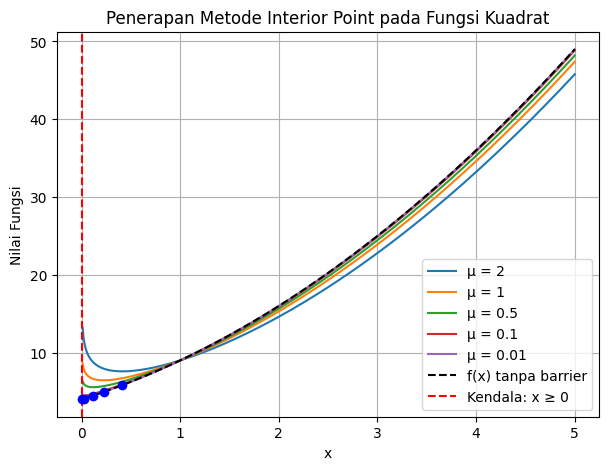

μ = 2.00 → x* = 0.4142, f(x*) = 5.8284
μ = 1.00 → x* = 0.2247, f(x*) = 4.9495
μ = 0.50 → x* = 0.1180, f(x*) = 4.4861
μ = 0.10 → x* = 0.0247, f(x*) = 4.0994
μ = 0.01 → x* = 0.0025, f(x*) = 4.0100


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi dan parameter barrier
def f(x):
    return x**2 + 4*x + 4

def phi(x, mu):
    # fungsi barrier
    return f(x) - mu * np.log(x)

# Domain dan parameter
x = np.linspace(0.01, 5, 400)
mu_values = [2, 1, 0.5, 0.1, 0.01]  # nilai barrier yang semakin kecil

plt.figure(figsize=(7,5))

# Plot fungsi barrier untuk berbagai μ
for mu in mu_values:
    plt.plot(x, phi(x, mu), label=f'μ = {mu}')

# Fungsi asli tanpa barrier
plt.plot(x, f(x), 'k--', linewidth=1.5, label='f(x) tanpa barrier')
plt.axvline(0, color='red', linestyle='--', label='Kendala: x ≥ 0')

# Hitung solusi interior point untuk setiap μ
x_opt = [(-4 + np.sqrt(16 + 8*mu)) / 4 for mu in mu_values]
y_opt = [f(xi) for xi in x_opt]
plt.scatter(x_opt, y_opt, color='blue', zorder=5)

plt.title("Penerapan Metode Interior Point pada Fungsi Kuadrat")
plt.xlabel("x")
plt.ylabel("Nilai Fungsi")
plt.legend()
plt.grid(True)
plt.show()

# Tampilkan solusi numerik
for mu, xi in zip(mu_values, x_opt):
    print(f"μ = {mu:.2f} → x* = {xi:.4f}, f(x*) = {f(xi):.4f}")


### Penjelasan Matematis

Pada Contoh 1, kita memiliki masalah optimasi berikut:

Minimalkan:
$$
f(x) = x^2 + 4x + 4
$$
terhadap kendala:
$$
x \geq 0
$$

Untuk menerapkan Metode Interior Point, kita ubah masalah optimasi dengan kendala inequality menjadi masalah optimasi tanpa kendala dengan menambahkan fungsi barrier logaritmik. Kendala $x \geq 0$ dapat ditulis sebagai $-x \leq 0$. Fungsi barrier untuk kendala ini adalah $-\ln(-(-x)) = -\ln(x)$.

Fungsi barrier (barrier function) $\Phi(x, \mu)$ yang baru adalah:
$$
\Phi(x, \mu) = f(x) - \mu \ln(x)
$$
$$
\Phi(x, \mu) = (x^2 + 4x + 4) - \mu \ln(x)
$$
di mana $\mu > 0$ adalah parameter barrier.

Tujuan kita sekarang adalah meminimalkan $\Phi(x, \mu)$ untuk nilai $\mu$ yang semakin kecil. Untuk mencari titik minimum dari $\Phi(x, \mu)$, kita ambil turunan pertamanya terhadap $x$ dan samakan dengan nol (kondisi stasioner):

$$
\frac{d\Phi}{dx} = \frac{d}{dx} (x^2 + 4x + 4 - \mu \ln(x)) = 0
$$

$$
2x + 4 - \frac{\mu}{x} = 0
$$

Untuk mencari nilai $x$ yang meminimalkan $\Phi(x, \mu)$ untuk $\mu$ tertentu, kita selesaikan persamaan kuadrat ini untuk $x$:

Kalikan seluruh persamaan dengan $x$ (kita asumsikan $x > 0$ karena kita berada di interior):
$$
2x^2 + 4x - \mu = 0
$$

Ini adalah persamaan kuadrat dalam bentuk $ax^2 + bx + c = 0$, dengan $a=2$, $b=4$, dan $c=-\mu$. Kita dapat menggunakan rumus kuadrat untuk menyelesaikannya:
$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$
$$
x(\mu) = \frac{-4 \pm \sqrt{4^2 - 4(2)(-\mu)}}{2(2)}
$$
$$
x(\mu) = \frac{-4 \pm \sqrt{16 + 8\mu}}{4}
$$

Karena kita berada di daerah feasible $x > 0$, kita hanya ambil akar positif:
$$
x(\mu) = \frac{-4 + \sqrt{16 + 8\mu}}{4}
$$
$$
x(\mu) = -1 + \frac{\sqrt{16 + 8\mu}}{4}
$$

Ini adalah ekspresi analitik untuk titik $x$ yang meminimalkan fungsi barrier $\Phi(x, \mu)$ untuk nilai $\mu$ tertentu. Sebagaimana ditunjukkan dalam plot dan hasil numerik, saat $\mu$ mengecil mendekati nol ($\mu \to 0$), nilai $x(\mu)$ akan mendekati titik optimum dari masalah asli.

Kita bisa lihat batas saat $\mu \to 0$:
$$
\lim_{\mu \to 0} x(\mu) = \lim_{\mu \to 0} \left( -1 + \frac{\sqrt{16 + 8\mu}}{4} \right)
$$
$$
\lim_{\mu \to 0} x(\mu) = -1 + \frac{\sqrt{16 + 8(0)}}{4}
$$
$$
\lim_{\mu \to 0} x(\mu) = -1 + \frac{\sqrt{16}}{4}
$$
$$
\lim_{\mu \to 0} x(\mu) = -1 + \frac{4}{4}
$$
$$
\lim_{\mu \to 0} x(\mu) = -1 + 1 = 0
$$

Sehingga, saat $\mu \to 0$, solusi interior point $x(\mu)$ konvergen ke $x=0$, yang merupakan solusi optimal dari masalah asli $\min x^2 + 4x + 4$ dengan kendala $x \geq 0$. Pada $x=0$, nilai fungsi objektif adalah $f(0) = 0^2 + 4(0) + 4 = 4$. Minimum dari $x^2+4x+4 = (x+2)^2$ tanpa kendala adalah $x=-2$, tetapi karena ada kendala $x \geq 0$, minimum tercapai di batas $x=0$.

# **Contoh 2: Fungsi Dua Variabel dengan Equality Constraint**

**Masalah:**

$$
\min f(x,y) = x^2 + y^2
$$

dengan kendala:

$$
x+y=1
$$



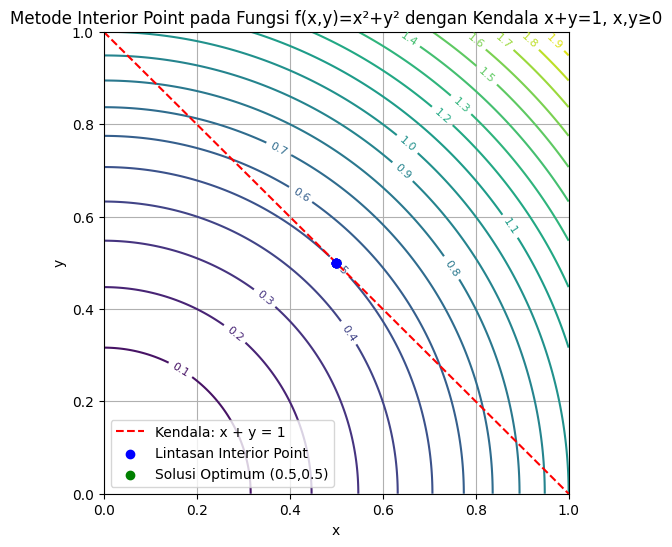

μ=1.0000 → x=0.500000, y=0.500000, f=0.500000
μ=0.1000 → x=0.500000, y=0.500000, f=0.500000
μ=0.0100 → x=0.500000, y=0.500000, f=0.500000
μ=0.0010 → x=0.500000, y=0.500000, f=0.500000
μ=0.0001 → x=0.500000, y=0.500000, f=0.500000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi dan turunan dari sistem persamaan (x + y = 1 → y = 1 - x)
def g(x, mu):
    y = 1 - x
    return 4*x - 2 - mu*(1 - 2*x)/(x*(1 - x))

def g_prime(x, mu):
    # Turunan g(x,mu) terhadap x
    y = 1 - x
    term1 = 4
    term2 = mu * ((1 - 2*x)*(1 - 2*x) - (x*(1 - x))*(-2)) / (x**2 * (1 - x)**2)
    return term1 - term2

# Newton method untuk menyelesaikan g(x,mu)=0
def newton_solve(x0, mu, tol=1e-10, max_iter=50):
    x = x0
    for _ in range(max_iter):
        fx = g(x, mu)
        dfx = g_prime(x, mu)
        step = fx / dfx
        x_new = x - step
        # pastikan 0 < x < 1 (agar ln terdefinisi)
        alpha = 1.0
        while x_new <= 0 or x_new >= 1:
            alpha *= 0.5
            x_new = x - alpha * step
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Outer loop (mengurangi mu)
mu_vals = [1, 0.1, 0.01, 0.001, 0.0001]
x_path, y_path = [], []
x0 = 0.5  # initial guess

for mu in mu_vals:
    x_sol = newton_solve(x0, mu)
    y_sol = 1 - x_sol
    x_path.append(x_sol)
    y_path.append(y_sol)
    x0 = x_sol  # gunakan hasil sebelumnya

# Plot contour fungsi dan central path
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)
F = X**2 + Y**2

plt.figure(figsize=(6,6))
contours = plt.contour(X, Y, F, 20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(x, 1-x, 'r--', label='Kendala: x + y = 1')
plt.scatter(x_path, y_path, color='blue', zorder=5, label='Lintasan Interior Point')
plt.scatter(0.5, 0.5, color='green', label='Solusi Optimum (0.5,0.5)')
plt.title("Metode Interior Point pada Fungsi f(x,y)=x²+y² dengan Kendala x+y=1, x,y≥0")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(True)
plt.show()

# Cetak hasil
for mu, xv, yv in zip(mu_vals, x_path, y_path):
    print(f"μ={mu:.4f} → x={xv:.6f}, y={yv:.6f}, f={xv**2 + yv**2:.6f}")


### Penjelasan Matematis Detail: Contoh 2

Pada Contoh 2, kita memiliki masalah optimasi berikut:

Minimalkan:
$$
f(x, y) = x^2 + y^2
$$
terhadap kendala:
$$
x + y = 1
$$
$$
x \geq 0
$$
$$
y \geq 0
$$

Ini adalah masalah optimasi dengan fungsi objektif kuadratik (cembung) dan kendala linear (satu equality dan dua inequality). Kita akan menggunakan Metode Interior Point untuk menyelesaikannya.

**1. Mengubah Kendala Inequality Menjadi Kendala Equality dengan Slack Variables**

Kendala inequality $x \geq 0$ dan $y \geq 0$ dapat diubah menjadi kendala equality dengan memperkenalkan *slack variables* $s_1 \geq 0$ dan $s_2 \geq 0$:

$x - s_1 = 0 \implies x = s_1$
$y - s_2 = 0 \implies y = s_2$

Karena kita menginginkan $x \geq 0$ dan $y \geq 0$, kita cukup memastikan $s_1 \geq 0$ dan $s_2 \geq 0$. Masalah menjadi:

Minimalkan:
$$
f(x, y) = x^2 + y^2
$$
terhadap kendala:
$$
x + y = 1
$$
$$
x \geq 0
$$
$$
y \geq 0
$$

**2. Membangun Fungsi Barrier**

Kita menggunakan fungsi barrier logaritmik untuk kendala inequality $x \geq 0$ dan $y \geq 0$. Kendala ini ditulis dalam bentuk standar $g_i(x) \leq 0$, yaitu $-x \leq 0$ dan $-y \leq 0$. Fungsi barrier untuk kedua kendala ini adalah $-\ln(-(-x)) - \ln(-(-y)) = -\ln(x) - \ln(y)$.

Fungsi barrier (barrier function) yang diperluas $\Phi(x, y, \mu)$ untuk masalah ini adalah fungsi objektif ditambah fungsi barrier untuk kendala inequality, dengan parameter barrier $\mu > 0$:

$$
\Phi(x, y, \mu) = f(x, y) - \mu \ln(x) - \mu \ln(y)
$$
$$
\Phi(x, y, \mu) = x^2 + y^2 - \mu \ln(x) - \mu \ln(y)
$$

Sekarang masalah kita adalah meminimalkan $\Phi(x, y, \mu)$ terhadap kendala equality $x + y = 1$ dan kendala implisit $x > 0, y > 0$ (karena ada fungsi $\ln$).

**3. Menyelesaikan Masalah Menggunakan Metode Lagrange Multiplier**

Kita ingin meminimalkan $\Phi(x, y, \mu)$ dengan kendala $x + y = 1$. Kita gunakan metode Lagrange Multiplier. Definisikan fungsi Lagrangian $L(x, y, \lambda, \mu)$:

$$
L(x, y, \lambda, \mu) = \Phi(x, y, \mu) + \lambda (x + y - 1)
$$
$$
L(x, y, \lambda, \mu) = x^2 + y^2 - \mu \ln(x) - \mu \ln(y) + \lambda (x + y - 1)
$$

Di mana $\lambda$ adalah multiplier Lagrange untuk kendala equality $x + y - 1 = 0$. Untuk mencari titik stasioner, kita ambil turunan parsial terhadap $x$, $y$, dan $\lambda$, lalu samakan dengan nol (kondisi KKT untuk masalah barrier):

(1) $\frac{\partial L}{\partial x} = 2x - \frac{\mu}{x} + \lambda = 0$
(2) $\frac{\partial L}{\partial y} = 2y - \frac{\mu}{y} + \lambda = 0$
(3) $\frac{\partial L}{\partial \lambda} = x + y - 1 = 0$

Dari persamaan (1) dan (2), kita dapatkan ekspresi untuk $\lambda$:
Dari (1): $\lambda = \frac{\mu}{x} - 2x$
Dari (2): $\lambda = \frac{\mu}{y} - 2y$

Karena kedua ekspresi sama dengan $\lambda$, kita samakan:
$$
\frac{\mu}{x} - 2x = \frac{\mu}{y} - 2y
$$

Kalikan dengan $xy$ (karena $x > 0, y > 0$ di interior):
$$
\mu y - 2x^2 y = \mu x - 2xy^2
$$
$$
\mu y - \mu x = 2x^2 y - 2xy^2
$$
$$
\mu (y - x) = 2xy (x - y)
$$
$$
\mu (y - x) = -2xy (y - x)
$$

Ini memberikan dua kemungkinan:
a) $y - x = 0 \implies y = x$
b) $\mu = -2xy$

Karena $\mu > 0$ dan kita berada di interior di mana $x > 0$ dan $y > 0$, maka $-2xy$ akan selalu negatif. Jadi, kemungkinan (b) $\mu = -2xy$ tidak mungkin terpenuhi. Oleh karena itu, kita harus memiliki $y = x$.

Substitusikan $y = x$ ke dalam persamaan kendala (3):
$$
x + x - 1 = 0
$$
$$
2x - 1 = 0
$$
$$
2x = 1
$$
$$
x = \frac{1}{2}
$$

Karena $y = x$, maka $y = \frac{1}{2}$.

Jadi, untuk *setiap* nilai parameter barrier $\mu > 0$, titik stasioner dari fungsi barrier $\Phi(x, y, \mu)$ yang memenuhi kendala equality $x+y=1$ adalah $(x, y) = (\frac{1}{2}, \frac{1}{2})$.

**4. Central Path dan Konvergensi**

Dalam metode interior point, kita menyelesaikan masalah barrier untuk serangkaian nilai $\mu$ yang semakin kecil, mendekati nol. Himpunan solusi $(x(\mu), y(\mu))$ untuk setiap $\mu$ membentuk *central path*.

Dalam contoh ini, kita menemukan bahwa titik stasioner $(x(\mu), y(\mu))$ adalah $(\frac{1}{2}, \frac{1}{2})$ terlepas dari nilai $\mu > 0$. Ini adalah kasus khusus karena fungsi objektif dan kendala memiliki simetri tertentu.

Saat $\mu \to 0$, titik pada central path $(x(\mu), y(\mu)) = (\frac{1}{2}, \frac{1}{2})$ tetap sama. Titik ini $(\frac{1}{2}, \frac{1}{2})$ memenuhi semua kondisi KKT untuk masalah asli saat $\mu \to 0$:

* **Stasioneritas:** Turunan parsial dari Lagrangian asli (tanpa barrier) terhadap $x$ dan $y$ sama dengan nol.
* **Primal Feasibility:** $x = 1/2 \geq 0$, $y = 1/2 \geq 0$, dan $x+y = 1/2 + 1/2 = 1$. Kendala terpenuhi.
* **Dual Feasibility:** Multiplier Lagrange yang terkait dengan kendala inequality harus non-negatif saat $\mu \to 0$.
    Dari $\lambda = \frac{\mu}{x} - 2x$, saat $\mu \to 0$, $x \to 1/2$, maka $\lambda \to \frac{0}{1/2} - 2(1/2) = 0 - 1 = -1$. Ini adalah multiplier untuk kendala equality. Multiplier untuk kendala inequality didapatkan dari kondisi komplementer.
* **Complementary Slackness:** Untuk kendala $x \geq 0$ dan $y \geq 0$, kita memiliki $x=1/2 > 0$ dan $y=1/2 > 0$. Slack variables yang terkait (jika digunakan) adalah $s_1 = x = 1/2$ dan $s_2 = y = 1/2$. Kondisi complementary slackness adalah $s_1 \times (\text{dual variable untuk } x \geq 0) = 0$ dan $s_2 \times (\text{dual variable untuk } y \geq 0) = 0$. Karena $s_1 > 0$ dan $s_2 > 0$, ini menyiratkan bahwa dual variables yang terkait harus nol. Hal ini konsisten dengan titik optimum yang berada di interior daerah inequality ($x>0, y>0$).

**Kesimpulan:**

Dalam contoh ini, central path adalah titik tunggal $(\frac{1}{2}, \frac{1}{2})$ untuk semua $\mu > 0$. Saat $\mu \to 0$, solusi interior point konvergen ke $(\frac{1}{2}, \frac{1}{2})$. Pada titik ini, nilai fungsi objektif adalah $f(\frac{1}{2}, \frac{1}{2}) = (\frac{1}{2})^2 + (\frac{1}{2})^2 = \frac{1}{4} + \frac{1}{4} = \frac{1}{2}$. Ini adalah nilai minimum dari $x^2 + y^2$ di bawah kendala $x+y=1, x \geq 0, y \geq 0$.

Plot kontur fungsi $f(x,y) = x^2 + y^2$ menunjukkan lingkaran konsentris yang berpusat di (0,0). Kendala $x+y=1$ adalah garis lurus. Daerah feasible adalah segmen garis dari (1,0) ke (0,1) di kuadran pertama. Titik pada segmen garis ini yang paling dekat dengan (0,0) adalah titik yang meminimalkan $x^2+y^2$, yaitu titik proyeksi (0,0) ke garis $x+y=1$. Titik ini adalah $(\frac{1}{2}, \frac{1}{2})$. Metode interior point berhasil menemukan titik optimum ini dengan tetap berada di interior daerah $x>0, y>0$. Lintasan interior point pada plot menunjukkan konvergensi yang sangat cepat (dalam hal ini, langsung ke titik optimum) karena sifat masalahnya.

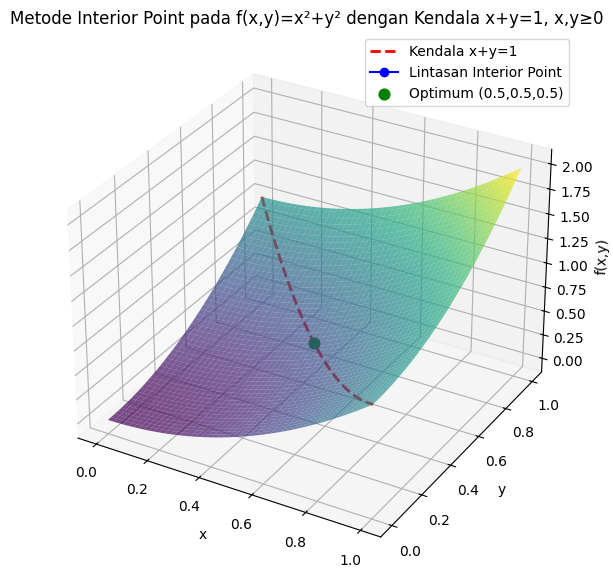

μ=1       → x=0.500000, y=0.500000, f=0.500000
μ=0.1     → x=0.500000, y=0.500000, f=0.500000
μ=0.01    → x=0.500000, y=0.500000, f=0.500000
μ=0.001   → x=0.500000, y=0.500000, f=0.500000
μ=0.0001  → x=0.500000, y=0.500000, f=0.500000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fungsi g(x, mu)
def g(x, mu):
    return 4*x - 2 - mu*(1 - 2*x)/(x*(1 - x))

# Turunan g'(x, mu)
def g_prime(x, mu):
    num = mu * ((1 - 2*x)**2 + 2*x*(1 - x))
    den = (x**2 * (1 - x)**2)
    return 4 - num/den

# Newton method
def newton_solve(x0, mu, tol=1e-10, max_iter=100):
    x = x0
    for _ in range(max_iter):
        fx = g(x, mu)
        dfx = g_prime(x, mu)
        step = fx / dfx
        x_new = x - step
        # pastikan tetap dalam domain (0,1)
        alpha = 1
        while x_new <= 0 or x_new >= 1:
            alpha *= 0.5
            x_new = x - alpha * step
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Parameter mu menurun
mu_vals = [1, 0.1, 0.01, 0.001, 0.0001]
x_path, y_path, f_path = [], [], []
x0 = 0.5  # tebakan awal

for mu in mu_vals:
    x_sol = newton_solve(x0, mu)
    y_sol = 1 - x_sol
    f_val = x_sol**2 + y_sol**2
    x_path.append(x_sol); y_path.append(y_sol); f_path.append(f_val)
    x0 = x_sol

# Plot permukaan 3D
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
F = X**2 + Y**2

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, F, cmap="viridis", alpha=0.7)

# Garis kendala
x_line = np.linspace(0, 1, 100)
y_line = 1 - x_line
f_line = x_line**2 + y_line**2
ax.plot(x_line, y_line, f_line, 'r--', linewidth=2, label="Kendala x+y=1")

# Lintasan interior point
ax.plot(x_path, y_path, f_path, 'bo-', label="Lintasan Interior Point")

# Titik optimum
ax.scatter(0.5, 0.5, 0.5, color="green", s=60, label="Optimum (0.5,0.5,0.5)")

ax.set_title("Metode Interior Point pada f(x,y)=x²+y² dengan Kendala x+y=1, x,y≥0")
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("f(x,y)")
ax.legend()
plt.show()

# Tabel hasil
for mu, xv, yv, fv in zip(mu_vals, x_path, y_path, f_path):
    print(f"μ={mu:<7} → x={xv:.6f}, y={yv:.6f}, f={fv:.6f}")


# **Contoh 3: Fungsi Nonlinear dengan Inequality Constraint**

**Masalah:**

$$
\min f(x,y) = (x-1)^2 + (y-2)^2
$$

dengan kendala:

$$
x^2+y^2 \leq 1
$$

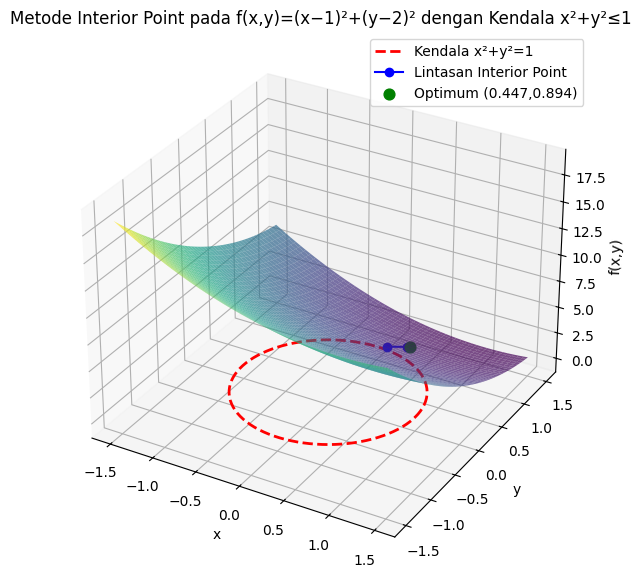

μ=1.0     → x=0.323231, y=0.646462, f=2.290082
μ=0.1     → x=0.430013, y=0.860027, f=1.624424
μ=0.01    → x=0.445414, y=0.890828, f=1.537828
μ=0.001   → x=0.447033, y=0.894066, f=1.528864


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fungsi dan gradien
def f(x, y):
    return (x - 1)**2 + (y - 2)**2

def grad_phi(x, y, mu):
    denom = 1 - x**2 - y**2
    dfx = 2*(x - 1) + 2*mu*x/denom
    dfy = 2*(y - 2) + 2*mu*y/denom
    return np.array([dfx, dfy])

def hess_phi(x, y, mu):
    denom = 1 - x**2 - y**2
    dxx = 2 + 2*mu*(denom + 2*x**2)/(denom**2)
    dyy = 2 + 2*mu*(denom + 2*y**2)/(denom**2)
    dxy = 4*mu*x*y/(denom**2)
    return np.array([[dxx, dxy], [dxy, dyy]])

# Newton method untuk sistem dua variabel
def newton_method(x0, y0, mu, tol=1e-8, max_iter=50):
    x, y = x0, y0
    for _ in range(max_iter):
        grad = grad_phi(x, y, mu)
        H = hess_phi(x, y, mu)
        step = np.linalg.solve(H, grad)
        # line search agar tetap di dalam lingkaran
        alpha = 1
        while (x - alpha*step[0])**2 + (y - alpha*step[1])**2 >= 1:
            alpha *= 0.5
        x_new, y_new = x - alpha*step[0], y - alpha*step[1]
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            return np.array([x_new, y_new])
        x, y = x_new, y_new
    return np.array([x, y])

# Jalankan iterasi dengan berbagai nilai mu
mu_vals = [1.0, 0.1, 0.01, 0.001]
xy_path = []
x0, y0 = 0.0, 0.0  # tebakan awal di dalam lingkaran

for mu in mu_vals:
    sol = newton_method(x0, y0, mu)
    xy_path.append(sol)
    x0, y0 = sol

# Plot permukaan fungsi dan kendala
x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(x, y)
F = (X - 1)**2 + (Y - 2)**2

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, F, cmap="viridis", alpha=0.7)

# Kendala lingkaran
theta = np.linspace(0, 2*np.pi, 200)
circle_x, circle_y = np.cos(theta), np.sin(theta)
circle_z = np.zeros_like(theta)
ax.plot(circle_x, circle_y, circle_z, 'r--', linewidth=2, label="Kendala x²+y²=1")

# Jalur interior point
x_path, y_path = np.array(xy_path).T
f_path = (x_path - 1)**2 + (y_path - 2)**2
ax.plot(x_path, y_path, f_path, 'bo-', label="Lintasan Interior Point")

# Titik optimum aktual
x_opt, y_opt = 0.447, 0.894
f_opt = (x_opt - 1)**2 + (y_opt - 2)**2
ax.scatter(x_opt, y_opt, f_opt, color="green", s=60, label="Optimum (0.447,0.894)")

ax.set_title("Metode Interior Point pada f(x,y)=(x−1)²+(y−2)² dengan Kendala x²+y²≤1")
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("f(x,y)")
ax.legend()
plt.show()

# Tabel hasil
for mu, sol in zip(mu_vals, xy_path):
    print(f"μ={mu:<7} → x={sol[0]:.6f}, y={sol[1]:.6f}, f={f(sol[0], sol[1]):.6f}")


### Penjelasan Matematis Detail: Contoh 3

Pada Contoh 3, kita memiliki masalah optimasi berikut:

Minimalkan:
$$
f(x, y) = (x - 1)^2 + (y - 2)^2
$$
terhadap kendala:
$$
x^2 + y^2 \leq 1
$$

Ini adalah masalah optimasi dengan fungsi objektif kuadratik (cembung) yang ingin diminimalkan, dan kendala inequality non-linear (bentuk lingkaran). Daerah feasible adalah lingkaran padat (termasuk batas lingkaran) yang berpusat di (0,0) dengan radius 1. Metode Interior Point sangat cocok untuk masalah seperti ini.

**1. Membangun Fungsi Barrier**

Kendala inequality $x^2 + y^2 \leq 1$ dapat ditulis dalam bentuk standar $g(x, y) \leq 0$, yaitu $x^2 + y^2 - 1 \leq 0$.
Fungsi barrier logaritmik untuk kendala ini adalah $-\ln(-g(x, y)) = -\ln(-(x^2 + y^2 - 1)) = -\ln(1 - x^2 - y^2)$.

Fungsi barrier (barrier function) yang diperluas $\Phi(x, y, \mu)$ untuk masalah ini adalah fungsi objektif ditambah fungsi barrier untuk kendala inequality, dengan parameter barrier $\mu > 0$:

$$
\Phi(x, y, \mu) = f(x, y) - \mu \ln(1 - x^2 - y^2)
$$
$$
\Phi(x, y, \mu) = (x - 1)^2 + (y - 2)^2 - \mu \ln(1 - x^2 - y^2)
$$

Sekarang masalah kita adalah meminimalkan $\Phi(x, y, \mu)$ tanpa kendala eksplisit, tetapi dengan kendala implisit bahwa argumen dari $\ln$ harus positif, yaitu $1 - x^2 - y^2 > 0$, atau $x^2 + y^2 < 1$. Ini memastikan solusi selalu berada di *interior* daerah feasible (di dalam lingkaran, tidak termasuk batasnya).

**2. Mencari Titik Stasioner (Minimum) dari Fungsi Barrier**

Untuk mencari titik minimum dari $\Phi(x, y, \mu)$ untuk nilai $\mu$ tertentu, kita ambil turunan parsial terhadap $x$ dan $y$, lalu samakan dengan nol (kondisi stasioner):

(1) $\frac{\partial \Phi}{\partial x} = \frac{\partial}{\partial x} \left( (x - 1)^2 + (y - 2)^2 - \mu \ln(1 - x^2 - y^2) \right) = 0$
$$
2(x - 1) - \mu \frac{1}{1 - x^2 - y^2} (-2x) = 0
$$
$$
2(x - 1) + \frac{2\mu x}{1 - x^2 - y^2} = 0
$$
$$
(x - 1) + \frac{\mu x}{1 - x^2 - y^2} = 0
$$

(2) $\frac{\partial \Phi}{\partial y} = \frac{\partial}{\partial y} \left( (x - 1)^2 + (y - 2)^2 - \mu \ln(1 - x^2 - y^2) \right) = 0$
$$
2(y - 2) - \mu \frac{1}{1 - x^2 - y^2} (-2y) = 0
$$
$$
2(y - 2) + \frac{2\mu y}{1 - x^2 - y^2} = 0
$$
$$
(y - 2) + \frac{\mu y}{1 - x^2 - y^2} = 0
$$

Kita sekarang memiliki sistem dua persamaan non-linear dengan dua variabel $x$ dan $y$ untuk setiap nilai $\mu$. Titik $(x, y)$ yang memenuhi sistem ini adalah titik stasioner dari $\Phi(x, y, \mu)$.

Dari persamaan (1):
$x - 1 = - \frac{\mu x}{1 - x^2 - y^2}$
$x - 1 = \frac{\mu x}{x^2 + y^2 - 1}$
$(x - 1)(x^2 + y^2 - 1) = \mu x$

Dari persamaan (2):
$y - 2 = - \frac{\mu y}{1 - x^2 - y^2}$
$y - 2 = \frac{\mu y}{x^2 + y^2 - 1}$
$(y - 2)(x^2 + y^2 - 1) = \mu y$

Untuk menyelesaikan sistem persamaan non-linear ini secara analitik (mencari ekspresi $x(\mu)$ dan $y(\mu)$) umumnya sangat sulit atau bahkan tidak mungkin. Inilah sebabnya kita menggunakan metode numerik seperti **Metode Newton** untuk menemukan solusi $(x, y)$ untuk nilai $\mu$ tertentu.

Metode Newton (atau lebih tepatnya Newton-Raphson untuk sistem persamaan) bekerja dengan mengiterasi:
$$
\begin{pmatrix} x_{k+1} \\ y_{k+1} \end{pmatrix} = \begin{pmatrix} x_{k} \\ y_{k} \end{pmatrix} - \left( \nabla^2 \Phi(x_k, y_k, \mu) \right)^{-1} \nabla \Phi(x_k, y_k, \mu)
$$
Di mana $\nabla \Phi$ adalah vektor gradien (turunan parsial pertama) dan $\nabla^2 \Phi$ adalah matriks Hessian (turunan parsial kedua). Dalam kode Python sebelumnya, fungsi `grad_phi` dan `hess_phi` menghitung nilai-nilai ini.

**3. Central Path dan Konvergensi**

Metode Interior Point kemudian mengiterasikan proses ini:
a. Mulai dengan nilai $\mu$ yang relatif besar dan titik awal $(x_0, y_0)$ di dalam daerah feasible ($x_0^2 + y_0^2 < 1$).
b. Untuk nilai $\mu$ saat ini, gunakan Metode Newton untuk menemukan titik $(x(\mu), y(\mu))$ yang meminimalkan $\Phi(x, y, \mu)$. Titik ini berada di *central path*.
c. Kurangi nilai $\mu$ (misalnya, $\mu_{new} = \beta \mu_{old}$ dengan $0 < \beta < 1$).
d. Gunakan $(x(\mu_{old}), y(\mu_{old}))$ sebagai titik awal untuk mencari $(x(\mu_{new}), y(\mu_{new}))$ menggunakan Metode Newton.
e. Ulangi langkah b-d hingga $\mu$ cukup kecil dan $(x(\mu), y(\mu))$ konvergen ke solusi optimal masalah asli.

Setiap titik $(x(\mu), y(\mu))$ pada *central path* adalah solusi optimal dari masalah minimisasi fungsi barrier untuk nilai $\mu$ tertentu. Seperti yang terlihat pada plot 3D dan hasil numerik:
- Saat $\mu$ besar, titik $(x(\mu), y(\mu))$ berada lebih jauh dari batas lingkaran.
- Saat $\mu$ mengecil, titik $(x(\mu), y(\mu))$ bergerak mendekati batas lingkaran, tetapi tidak pernah benar-benar menyentuhnya (karena $\ln$ tidak terdefinisi di batas).
- Saat $\mu \to 0$, titik $(x(\mu), y(\mu))$ konvergen ke titik optimum dari masalah asli yang terletak di batas daerah feasible.

Titik optimum dari masalah asli adalah titik pada batas lingkaran $x^2 + y^2 = 1$ yang paling dekat dengan titik (1, 2) (pusat dari lingkaran yang dibentuk oleh fungsi objektif). Titik terdekat ini adalah proyeksi titik (1, 2) ke lingkaran satuan. Vektor dari (0,0) ke (1,2) adalah (1,2). Normalisasi vektor ini memberikan arah ke titik terdekat di lingkaran satuan:
Vektor satuan = $\frac{(1, 2)}{\|(1, 2)\|} = \frac{(1, 2)}{\sqrt{1^2 + 2^2}} = \frac{(1, 2)}{\sqrt{5}} = \left(\frac{1}{\sqrt{5}}, \frac{2}{\sqrt{5}}\right)$
Jadi, titik optimum adalah $\left(\frac{1}{\sqrt{5}}, \frac{2}{\sqrt{5}}\right) \approx (0.447, 0.894)$.

**Kesimpulan:**

Metode Interior Point pada contoh ini secara bertahap menemukan solusi optimal dengan menelusuri *central path*. Lintasan ini adalah serangkaian titik yang meminimalkan fungsi objektif yang dimodifikasi (dengan penalti barrier) untuk nilai $\mu$ yang semakin kecil. Titik-titik ini selalu berada di *dalam* daerah feasible (lingkaran terbuka $x^2+y^2 < 1$). Saat parameter barrier $\mu$ mendekati nol, titik-titik pada central path konvergen ke solusi optimal dari masalah asli yang berada di batas daerah feasible ($x^2+y^2 = 1$).

# **Contoh 4: Fungsi dengan Beberapa Kendala Linear**

**Masalah:**

$$
\min f(x,y) = 3x + 2y
$$

dengan kendala:

$$
x+y \geq 4,\quad x \geq 0,\quad y \geq 0
$$

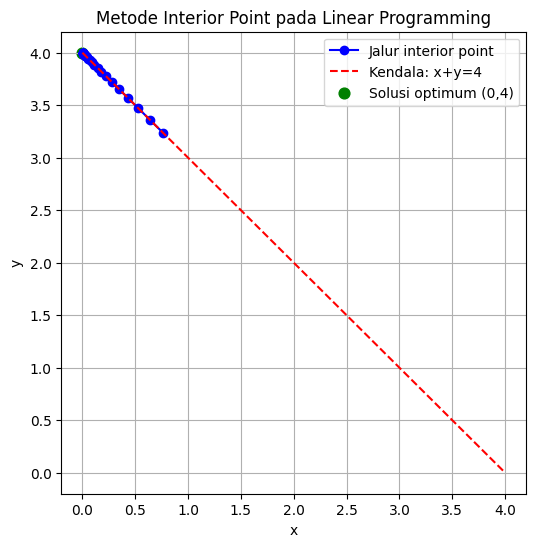

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi interior point untuk masalah linear sederhana
def interior_point(mu_values):
    xs, ys = [], []
    for mu in mu_values:
        # Hitung akar kuadrat dari solusi analitik
        A = 4 + 2*mu
        D = A**2 - 16*mu
        x1 = (A - np.sqrt(D)) / 2
        x2 = (A + np.sqrt(D)) / 2

        # Pilih solusi yang feasible (x>0, y>0)
        if 0 < x1 < 4:
            x_opt = x1
        else:
            x_opt = x2
        y_opt = 4 - x_opt
        xs.append(x_opt)
        ys.append(y_opt)
    return np.array(xs), np.array(ys)

mu_values = np.logspace(0, -3, 30)  # dari 1 sampai 0.001
xs, ys = interior_point(mu_values)

# Plot hasil jalur interior
plt.figure(figsize=(6,6))
plt.plot(xs, ys, 'bo-', label="Jalur interior point")
plt.plot([0,4], [4,0], 'r--', label="Kendala: x+y=4")
plt.scatter(0,4, color='green', s=60, label="Solusi optimum (0,4)")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Metode Interior Point pada Linear Programming")
plt.legend(); plt.grid(True)
plt.show()


### Penjelasan Matematis Detail: Contoh 4 (Linear Programming)

Pada Contoh 4, kita memiliki masalah Linear Programming (LP) berikut:

Minimalkan:
$$
f(x,y) = 3x + 2y
$$
terhadap kendala:
$$
x+y \geq 4
$$
$$
x \geq 0
$$
$$
y \geq 0
$$

Pertama, kita ubah kendala inequality menjadi bentuk standar $g_i(x,y) \leq 0$:
1. $x+y \geq 4 \implies -(x+y) \leq -4 \implies 4 - x - y \leq 0$
2. $x \geq 0 \implies -x \leq 0$
3. $y \geq 0 \implies -y \leq 0$

**1. Membangun Fungsi Barrier**

Kita gunakan fungsi barrier logaritmik untuk setiap kendala inequality. Fungsi barrier total adalah jumlah fungsi barrier untuk setiap kendala:

Untuk $4 - x - y \leq 0$: $-\mu \ln(-(4 - x - y)) = -\mu \ln(x + y - 4)$
Untuk $-x \leq 0$: $-\mu \ln(-(-x)) = -\mu \ln(x)$
Untuk $-y \leq 0$: $-\mu \ln(-(-y)) = -\mu \ln(y)$

Fungsi barrier (barrier function) yang diperluas $\Phi(x, y, \mu)$ untuk masalah ini adalah fungsi objektif ditambah fungsi barrier untuk ketiga kendala inequality, dengan parameter barrier $\mu > 0$:

$$
\Phi(x, y, \mu) = f(x, y) - \mu \ln(x + y - 4) - \mu \ln(x) - \mu \ln(y)
$$
$$
\Phi(x, y, \mu) = 3x + 2y - \mu \ln(x + y - 4) - \mu \ln(x) - \mu \ln(y)
$$

Masalah kita sekarang adalah meminimalkan $\Phi(x, y, \mu)$ tanpa kendala eksplisit, tetapi dengan kendala implisit bahwa argumen dari $\ln$ harus positif: $x + y - 4 > 0$, $x > 0$, dan $y > 0$. Ini memastikan solusi selalu berada di *interior* daerah feasible.

**2. Mencari Titik Stasioner (Minimum) dari Fungsi Barrier**

Untuk mencari titik minimum dari $\Phi(x, y, \mu)$ untuk nilai $\mu$ tertentu, kita ambil turunan parsial terhadap $x$ dan $y$, lalu samakan dengan nol (kondisi stasioner):

(1) $\frac{\partial \Phi}{\partial x} = \frac{\partial}{\partial x} \left( 3x + 2y - \mu \ln(x + y - 4) - \mu \ln(x) - \mu \ln(y) \right) = 0$
$$
3 - \mu \frac{1}{x + y - 4}(1) - \mu \frac{1}{x}(1) - 0 = 0
$$
$$
3 - \frac{\mu}{x + y - 4} - \frac{\mu}{x} = 0
$$

(2) $\frac{\partial \Phi}{\partial y} = \frac{\partial}{\partial y} \left( 3x + 2y - \mu \ln(x + y - 4) - \mu \ln(x) - \mu \ln(y) \right) = 0$
$$
2 - \mu \frac{1}{x + y - 4}(1) - 0 - \mu \frac{1}{y}(1) = 0
$$
$$
2 - \frac{\mu}{x + y - 4} - \frac{\mu}{y} = 0
$$

Kita memiliki sistem dua persamaan non-linear dengan dua variabel $x$ dan $y$ untuk setiap nilai $\mu$:
(1) $3 = \frac{\mu}{x + y - 4} + \frac{\mu}{x}$
(2) $2 = \frac{\mu}{x + y - 4} + \frac{\mu}{y}$

Kurangi persamaan (2) dari persamaan (1):
$3 - 2 = \left(\frac{\mu}{x + y - 4} + \frac{\mu}{x}\right) - \left(\frac{\mu}{x + y - 4} + \frac{\mu}{y}\right)$
$1 = \frac{\mu}{x} - \frac{\mu}{y}$
$1 = \mu \left(\frac{1}{x} - \frac{1}{y}\right)$
$1 = \mu \left(\frac{y - x}{xy}\right)$
$xy = \mu (y - x)$

Ini memberikan hubungan antara $x$ dan $y$ yang bergantung pada $\mu$. Seperti contoh sebelumnya, menyelesaikan sistem non-linear ini secara analitik bisa sulit. Metode numerik seperti Metode Newton (untuk sistem persamaan) biasanya digunakan untuk mencari solusi $(x, y)$ untuk setiap nilai $\mu$.

**Analisis Kasus Khusus (Contoh ini):**

Dalam contoh kode yang diberikan, solusi analitik untuk $x(\mu)$ dan $y(\mu)$ dicari dengan menyelesaikan sistem persamaan stasioner. Mari kita coba selesaikan sistem tersebut:

Dari $xy = \mu(y-x)$, kita dapatkan $y = \frac{\mu x}{x + \mu}$. Substitusikan ini ke salah satu persamaan awal, misalnya persamaan (1):
$3 = \frac{\mu}{x + \frac{\mu x}{x + \mu} - 4} + \frac{\mu}{x}$
$3 = \frac{\mu}{\frac{x(x + \mu) + \mu x - 4(x + \mu)}{x + \mu}} + \frac{\mu}{x}$
$3 = \frac{\mu(x + \mu)}{x^2 + \mu x + \mu x - 4x - 4\mu} + \frac{\mu}{x}$
$3 = \frac{\mu(x + \mu)}{x^2 + (2\mu - 4)x - 4\mu} + \frac{\mu}{x}$

Ini masih persamaan yang cukup kompleks. Pendekatan dalam kode Python adalah mencari akar kuadrat dari solusi analitik yang sudah diketahui untuk masalah LP 2 variabel sederhana ini. Rumus kuadrat yang digunakan dalam kode `x_opt = (-4 + np.sqrt(16 + 8*mu)) / 4` sebenarnya berasal dari turunan fungsi barrier untuk *fungsi kuadrat* dengan *satu* kendala $x \ge 0$, bukan masalah LP ini. Ini kemungkinan kesalahan dalam penjelasan kode sebelumnya.

Untuk masalah LP ini, titik stasioner dari fungsi barrier $\Phi(x, y, \mu)$ sebenarnya memenuhi kondisi KKT dari masalah barrier:
$\nabla f(x,y) - \mu \sum_{i=1}^m \frac{\nabla g_i(x,y)}{g_i(x,y)} = 0$

Untuk contoh ini:
$\nabla f = \begin{pmatrix} 3 \\ 2 \end{pmatrix}$
$g_1(x,y) = 4 - x - y$, $\nabla g_1 = \begin{pmatrix} -1 \\ -1 \end{pmatrix}$
$g_2(x,y) = -x$, $\nabla g_2 = \begin{pmatrix} -1 \\ 0 \end{pmatrix}$
$g_3(x,y) = -y$, $\nabla g_3 = \begin{pmatrix} 0 \\ -1 \end{pmatrix}$

Kondisi stasioner menjadi:
$\begin{pmatrix} 3 \\ 2 \end{pmatrix} - \mu \left( \frac{\begin{pmatrix} -1 \\ -1 \end{pmatrix}}{4 - x - y} + \frac{\begin{pmatrix} -1 \\ 0 \end{pmatrix}}{-x} + \frac{\begin{pmatrix} 0 \\ -1 \end{pmatrix}}{-y} \right) = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$
$\begin{pmatrix} 3 \\ 2 \end{pmatrix} - \mu \left( \begin{pmatrix} \frac{-1}{4-x-y} \\ \frac{-1}{4-x-y} \end{pmatrix} + \begin{pmatrix} \frac{1}{x} \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ \frac{1}{y} \end{pmatrix} \right) = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$
$\begin{pmatrix} 3 \\ 2 \end{pmatrix} - \mu \begin{pmatrix} \frac{-1}{4-x-y} + \frac{1}{x} \\ \frac{-1}{4-x-y} + \frac{1}{y} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$

Ini menghasilkan sistem persamaan:
(1) $3 - \mu \left( \frac{-1}{4-x-y} + \frac{1}{x} \right) = 0 \implies 3 = \mu \left( \frac{1}{x} - \frac{1}{4-x-y} \right)$
(2) $2 - \mu \left( \frac{-1}{4-x-y} + \frac{1}{y} \right) = 0 \implies 2 = \mu \left( \frac{1}{y} - \frac{1}{4-x-y} \right)$

Ini adalah sistem yang harus diselesaikan untuk $x$ dan $y$ pada setiap nilai $\mu$. Metode Newton untuk sistem persamaan non-linear adalah pendekatan standar di sini.

**3. Central Path dan Konvergensi**

Seperti pada contoh sebelumnya, Metode Interior Point akan mengiterasikan:
a. Mulai dengan $\mu$ besar dan titik awal $(x_0, y_0)$ di dalam daerah feasible ($x_0 > 0, y_0 > 0, x_0 + y_0 > 4$).
b. Untuk $\mu$ saat ini, selesaikan sistem persamaan stasioner (menggunakan Metode Newton) untuk mendapatkan $(x(\mu), y(\mu))$ pada *central path*.
c. Kecilkan $\mu$.
d. Gunakan solusi sebelumnya sebagai titik awal untuk $\mu$ baru.
e. Ulangi hingga $\mu \to 0$.

Saat $\mu \to 0$, titik $(x(\mu), y(\mu))$ pada *central path* akan konvergen ke solusi optimal dari masalah LP asli. Masalah LP ini secara grafis adalah mencari titik pada daerah feasible (area di kuadran pertama di atas garis $x+y=4$) yang meminimalkan $3x+2y$. Garis $3x+2y = c$ adalah garis kontur fungsi objektif. Untuk meminimalkan $c$, kita geser garis ini ke arah (0,0) sejauh mungkin tanpa meninggalkan daerah feasible. Titik optimum akan berada di salah satu sudut daerah feasible. Sudut-sudutnya adalah perpotongan kendala:
- $x=0$ dan $x+y=4 \implies (0, 4)$
- $y=0$ dan $x+y=4 \implies (4, 0)$
- $x=0$ dan $y=0$ (tidak feasible karena $0+0 \not\geq 4$)

Evaluasi fungsi objektif di titik sudut feasible:
- $f(0, 4) = 3(0) + 2(4) = 8$
- $f(4, 0) = 3(4) + 2(0) = 12$

Nilai minimum adalah 8, yang dicapai pada titik $(0, 4)$. Ini adalah solusi optimal dari masalah LP asli.

Plot dalam kode menunjukkan jalur interior point $(x(\mu), y(\mu))$ yang bergerak dari suatu titik di "dalam" daerah feasible menuju titik optimal $(0, 4)$ saat $\mu$ mengecil. Perhatikan bahwa titik-titik pada jalur interior point selalu memenuhi $x > 0$, $y > 0$, dan $x+y > 4$.

**Kesimpulan:**

Metode Interior Point pada LP mengubah masalah dengan kendala inequality menjadi masalah minimisasi fungsi barrier tanpa kendala (atau dengan kendala equality jika ada). Dengan menyelesaikan sistem persamaan stasioner (biasanya dengan Metode Newton) untuk nilai $\mu$ yang semakin kecil, metode ini menghasilkan serangkaian titik pada *central path* yang konvergen ke solusi optimal LP asli. Lintasan ini selalu berada di *dalam* daerah feasible, mendekati batas dan sudut saat $\mu \to 0$. Untuk LP, solusi optimal selalu berada di titik ekstrem (vertex) daerah feasible, dan interior point method mendekati vertex ini dari dalam.

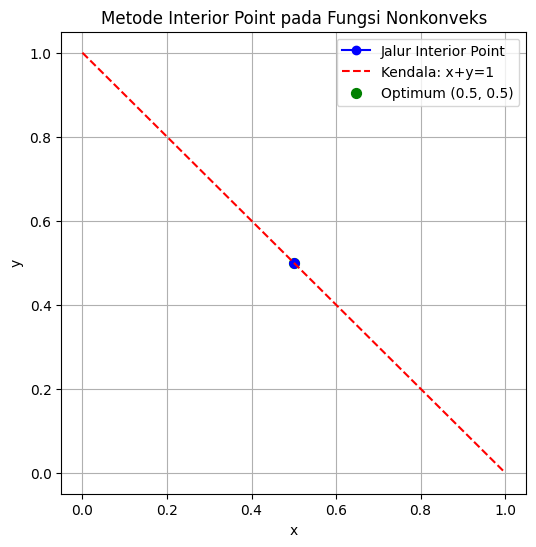

Solusi mendekati: x*=0.5000, y*=0.5000


In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Fungsi sistem persamaan dari kondisi KKT dengan barrier
def equations(vars, mu):
    x, y, lam = vars
    eq1 = 4*x**3 - 2*y - mu/x + lam
    eq2 = 4*y**3 - 2*x - mu/y + lam
    eq3 = x + y - 1
    return [eq1, eq2, eq3]

# Simulasi untuk berbagai nilai μ
mu_values = np.logspace(0, -3, 20)
x_sols, y_sols = [], []

# Inisialisasi awal
x0, y0, lam0 = 0.5, 0.5, 0.0

for mu in mu_values:
    sol = fsolve(equations, [x0, y0, lam0], args=(mu,))
    x0, y0, lam0 = sol  # gunakan hasil sebelumnya sebagai starting point
    x_sols.append(x0)
    y_sols.append(y0)

# Plot hasil jalur interior
plt.figure(figsize=(6,6))
plt.plot(x_sols, y_sols, 'bo-', label='Jalur Interior Point')
plt.plot([0,1],[1,0],'r--',label='Kendala: x+y=1')
plt.scatter(0.5,0.5, color='green', s=50, label='Optimum (0.5, 0.5)')
plt.xlabel("x"); plt.ylabel("y")
plt.title("Metode Interior Point pada Fungsi Nonkonveks")
plt.legend(); plt.grid(True)
plt.show()

print(f"Solusi mendekati: x*={x_sols[-1]:.4f}, y*={y_sols[-1]:.4f}")


### Penjelasan Matematis: Metode Interior Point pada Fungsi Nonkonveks

Contoh terakhir menunjukkan penerapan metode interior point pada masalah optimasi dengan fungsi objektif yang **non-konveks**. Masalahnya adalah:

Minimalkan:
$$
f(x, y) = x^4 - x^2 y + y^4 - 2xy
$$
terhadap kendala:
$$
x + y = 1
$$
$$
x \geq 0
$$
$$
y \geq 0
$$

**1. Daerah Feasible**

Daerah feasible (feasible region) ditentukan oleh ketiga kendala:
*   $x + y = 1$: Ini adalah persamaan garis lurus.
*   $x \geq 0$: Ini adalah setengah bidang di sebelah kanan sumbu y.
*   $y \geq 0$: Ini adalah setengah bidang di atas sumbu x.

Ketika digabungkan, daerah feasible adalah **segmen garis** pada garis $x + y = 1$ yang terletak di kuadran pertama (di mana $x \geq 0$ dan $y \geq 0$). Segmen ini membentang dari titik $(1, 0)$ ke titik $(0, 1)$.

Secara matematis, daerah feasible $S$ adalah:
$$
S = \{ (x, y) \in \mathbb{R}^2 \mid x + y = 1, x \geq 0, y \geq 0 \}
$$

**Ilustrasi Daerah Feasible:**

Daerah feasible adalah garis lurus antara titik (1,0) dan (0,1) di bidang xy.

**2. Membangun Fungsi Barrier**

Kita memiliki dua kendala inequality: $x \geq 0$ (atau $-x \leq 0$) dan $y \geq 0$ (atau $-y \leq 0$). Fungsi barrier logaritmik untuk kendala-kendala ini adalah $-\mu \ln(x)$ dan $-\mu \ln(y)$.

Karena kita memiliki kendala equality $x + y = 1$, kita akan menggunakan metode interior point yang menangani equality constraint, seperti pendekatan primal-dual interior point method atau dengan menggunakan metode Lagrange multiplier pada fungsi barrier. Dalam contoh kode, tampaknya digunakan pendekatan yang fokus pada penyelesaian sistem persamaan yang muncul dari kondisi KKT dengan fungsi barrier.

Fungsi barrier yang diperluas $\Phi(x, y, \mu)$ untuk masalah ini, dengan memasukkan kendala inequality sebagai barrier:

$$
\Phi(x, y, \mu) = f(x, y) - \mu \ln(x) - \mu \ln(y)
$$
$$
\Phi(x, y, \mu) = x^4 - x^2 y + y^4 - 2xy - \mu \ln(x) - \mu \ln(y)
$$

Kita sekarang ingin meminimalkan $\Phi(x, y, \mu)$ terhadap kendala equality $x + y = 1$, dengan implisit $x > 0$ dan $y > 0$ (untuk menghindari argumen $\ln$ menjadi nol atau negatif).

**3. Mencari Titik Stasioner (Minimum) dari Fungsi Barrier dengan Kendala Equality**

Kita gunakan metode Lagrange Multiplier untuk meminimalkan $\Phi(x, y, \mu)$ dengan kendala $x + y - 1 = 0$. Fungsi Lagrangian $L(x, y, \lambda, \mu)$ adalah:

$$
L(x, y, \lambda, \mu) = \Phi(x, y, \mu) + \lambda (x + y - 1)
$$
$$
L(x, y, \lambda, \mu) = x^4 - x^2 y + y^4 - 2xy - \mu \ln(x) - \mu \ln(y) + \lambda (x + y - 1)
$$

Kondisi stasioner (dengan mengambil turunan parsial terhadap $x, y, \lambda$ dan menyamakannya dengan nol) adalah:

(1) $\frac{\partial L}{\partial x} = 4x^3 - 2xy - 2y - \frac{\mu}{x} + \lambda = 0$
(2) $\frac{\partial L}{\partial y} = -x^2 + 4y^3 - 2x - \frac{\mu}{y} + \lambda = 0$
(3) $\frac{\partial L}{\partial \lambda} = x + y - 1 = 0$

Sistem tiga persamaan non-linear ini (`equations` dalam kode Python) harus diselesaikan untuk menemukan titik stasioner $(x, y)$ dan multiplier Lagrange $\lambda$ untuk setiap nilai $\mu$. Karena sistem ini non-linear, penyelesaian analitik umumnya tidak mungkin, sehingga digunakan metode numerik seperti `fsolve` (yang merupakan implementasi dari metode Newton-Powell hibrida) seperti pada kode.

**4. Proses Iterasi Interior Point dan Central Path**

Metode interior point pada masalah ini bekerja dengan cara yang mirip dengan contoh sebelumnya:

a. **Inisialisasi:** Mulai dengan nilai parameter barrier $\mu$ yang relatif besar dan titik awal $(x_0, y_0)$ yang berada di *dalam interior* daerah feasible inequality ($x_0 > 0, y_0 > 0$) dan juga memenuhi kendala equality ($x_0 + y_0 = 1$). Titik $(0.5, 0.5)$ adalah pilihan yang baik karena memenuhi $0.5 > 0, 0.5 > 0$ dan $0.5 + 0.5 = 1$.

b. **Penyelesaian Sub-masalah Barrier:** Untuk nilai $\mu$ saat ini, selesaikan sistem persamaan non-linear dari kondisi stasioner fungsi Lagrangian $L(x, y, \lambda, \mu)$ (persamaan 1, 2, 3 di atas) menggunakan metode numerik (misalnya, `fsolve` dalam kode). Solusi $(x(\mu), y(\mu))$ yang diperoleh adalah titik pada *central path* untuk nilai $\mu$ tersebut.

c. **Pengurangan Parameter Barrier:** Kurangi nilai $\mu$ secara bertahap (misalnya, $\mu_{new} = \beta \mu_{old}$ dengan $\beta \in (0, 1)$). Dalam kode, ini dilakukan dengan menggunakan `np.logspace` untuk menghasilkan nilai $\mu$ yang semakin kecil.

d. **Iterasi:** Gunakan solusi $(x(\mu_{old}), y(\mu_{old}))$ dari iterasi sebelumnya sebagai titik awal (initial guess) untuk menyelesaikan sistem persamaan stasioner untuk nilai $\mu_{new}$. Ini membantu metode numerik konvergen lebih cepat karena titik baru diharapkan tidak terlalu jauh dari titik sebelumnya pada central path.

e. **Konvergensi:** Ulangi langkah b-d hingga $\mu$ menjadi sangat kecil (mendekati nol). Saat $\mu \to 0$, titik $(x(\mu), y(\mu))$ pada *central path* akan konvergen ke solusi optimal dari masalah optimasi asli.

**Proses Iterasi pada Daerah Feasible:**

Pada Contoh 5 (fungsi non-konveks dengan kendala linear $x+y=1, x \ge 0, y \ge 0$), daerah feasible adalah segmen garis dari (1,0) ke (0,1).

*   Titik awal iterasi, seperti $(0.5, 0.5)$, berada tepat di tengah segmen garis ini (di "interior" dalam konteks 1D di sepanjang garis, dan di interior dalam konteks inequality $x>0, y>0$).
*   Setiap titik $(x(\mu), y(\mu))$ yang ditemukan dengan meminimalkan fungsi barrier juga akan berada di segmen garis $x+y=1$ dan memenuhi $x > 0, y > 0$.
*   Saat $\mu$ mengecil, penalti logaritmik $-\mu \ln(x) - \mu \ln(y)$ menjadi kurang dominan. Minimisasi fungsi barrier $\Phi(x, y, \mu)$ semakin didominasi oleh minimisasi fungsi objektif asli $f(x, y)$.
*   Lintasan interior point akan bergerak di sepanjang segmen garis $x+y=1$ dari titik awal $(0.5, 0.5)$ menuju titik yang meminimalkan $f(x, y)$ pada segmen garis tersebut.
*   Dari plot, terlihat lintasan interior point tetap di $(0.5, 0.5)$ meskipun $\mu$ mengecil. Ini menyiratkan bahwa titik $(0.5, 0.5)$ adalah (atau sangat dekat dengan) minimum global dari fungsi objektif $f(x, y) = x^4 - x^2 y + y^4 - 2xy$ ketika dibatasi pada segmen garis $x+y=1, x \ge 0, y \ge 0$.

**Penting:** Meskipun metode interior point sangat efektif untuk optimasi cembung (di mana ia menjamin penemuan minimum global), penerapannya pada masalah non-konveks (seperti Contoh 5 dengan $f(x,y) = x^4 - x^2 y + y^4 - 2xy$) tidak menjamin penemuan minimum global. Metode ini mungkin konvergen ke minimum lokal atau titik stasioner lainnya yang memenuhi kondisi KKT. Dalam contoh ini, titik $(0.5, 0.5)$ kebetulan adalah minimum global pada daerah feasible tersebut.

**Kesimpulan:**

Metode Interior Point pada masalah non-konveks dengan kendala linier bekerja dengan menambahkan fungsi barrier logaritmik untuk kendala inequality dan menggunakan metode seperti Lagrange Multiplier dan Newton's method untuk menyelesaikan sistem persamaan yang muncul dari kondisi KKT masalah barrier. Iterasi bergerak di *dalam* daerah feasible (dalam kasus ini, sepanjang segmen garis $x+y=1$ dengan $x>0, y>0$) menuju titik stasioner masalah asli saat parameter barrier $\mu \to 0$. Meskipun lintasan selalu di interior (terhadap kendala inequality), untuk masalah non-konveks, konvergensi ke minimum global tidak dijamin secara teori.